In [1]:
def train_svc(C, X, Y, **kwargs):
    import utulek
    from sklearn import svm
    return svm.SVC(C=C, **kwargs).fit(utulek.transform_flatten_img_ds_X(X), Y)


def calc_svc_acc(svc, X, Y):
    import utulek
    import numpy as np
    return np.count_nonzero(
        Y == svc.predict(utulek.transform_flatten_img_ds_X(X))) / len(Y)


In [2]:
%%time
import math
import utulek

# Categorical grid search.
row_labels = (
    ("mnist", {"gamma": "scale"}),
    ("mnist", {"kernel": "linear"}),
    ("mnist", {"degree": 1, "kernel": "poly", "gamma": 1}),
    ("mnist", {"degree": 2, "kernel": "poly"}),
    ("mnist", {"degree": 3, "kernel": "poly"}),
    ("mnist", {"degree": 4, "kernel": "poly"}),
    ("mnist", {"degree": 5, "kernel": "poly"}),
    ("cifar10", {"gamma": "scale"}),
    ("cifar10", {"kernel": "linear"}),
    ("cifar10", {"degree": 1, "kernel": "poly", "gamma": 1}),
    ("cifar10", {"degree": 2, "kernel": "poly"}),
    ("cifar10", {"degree": 3, "kernel": "poly"}),
    ("cifar10", {"degree": 4, "kernel": "poly"}),
    ("cifar10", {"degree": 5, "kernel": "poly"}))
col_labels = [math.e**i for i in range(-8, 9)]
dss = {
    "mnist": (
        utulek.fetch_tfds_img_ds("mnist", "train[:1024]"),
        utulek.fetch_tfds_img_ds("mnist", "test[:256]")),
    "cifar10": (
        utulek.fetch_tfds_img_ds("cifar10", "train[:1024]"),
        utulek.fetch_tfds_img_ds("cifar10", "test[:256]"))}
svcs = []
for i in range(len(row_labels)):
    svcs.append([])
    for j in range(len(col_labels)):
        svcs[-1].append(train_svc(
            col_labels[j],
            *dss[row_labels[i][0]][0],
            **row_labels[i][1]))
accs = []
for i in range(len(row_labels)):
    accs.append([])
    for j in range(len(col_labels)):
        accs[-1].append(calc_svc_acc(
            svcs[i][j], *dss[row_labels[i][0]][1]))
print(accs)


[[0.10546875, 0.10546875, 0.10546875, 0.10546875, 0.10546875, 0.3828125, 0.8515625, 0.91796875, 0.93359375, 0.9375, 0.94140625, 0.94140625, 0.94140625, 0.94140625, 0.94140625, 0.94140625, 0.94140625], [0.3046875, 0.7421875, 0.86328125, 0.89453125, 0.88671875, 0.90625, 0.90234375, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625], [0.3046875, 0.7421875, 0.86328125, 0.89453125, 0.88671875, 0.90625, 0.90234375, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625], [0.10546875, 0.10546875, 0.10546875, 0.10546875, 0.36328125, 0.6328125, 0.83984375, 0.88671875, 0.9296875, 0.9296875, 0.93359375, 0.93359375, 0.93359375, 0.93359375, 0.93359375, 0.93359375, 0.93359375], [0.10546875, 0.10546875, 0.10546875, 0.12109375, 0.375, 0.578125, 0.7734375, 0.85546875, 0.90234375, 0.9140625, 0.9140625, 0.91015625, 0.91015625, 0.91015625, 0.91015625, 0.91015625, 0.91015625], [0.10546875, 0.10546875, 0.10546875, 0.17578125, 0.3710937

Text(-138.43300000000005, 0.5, 'ds, type')

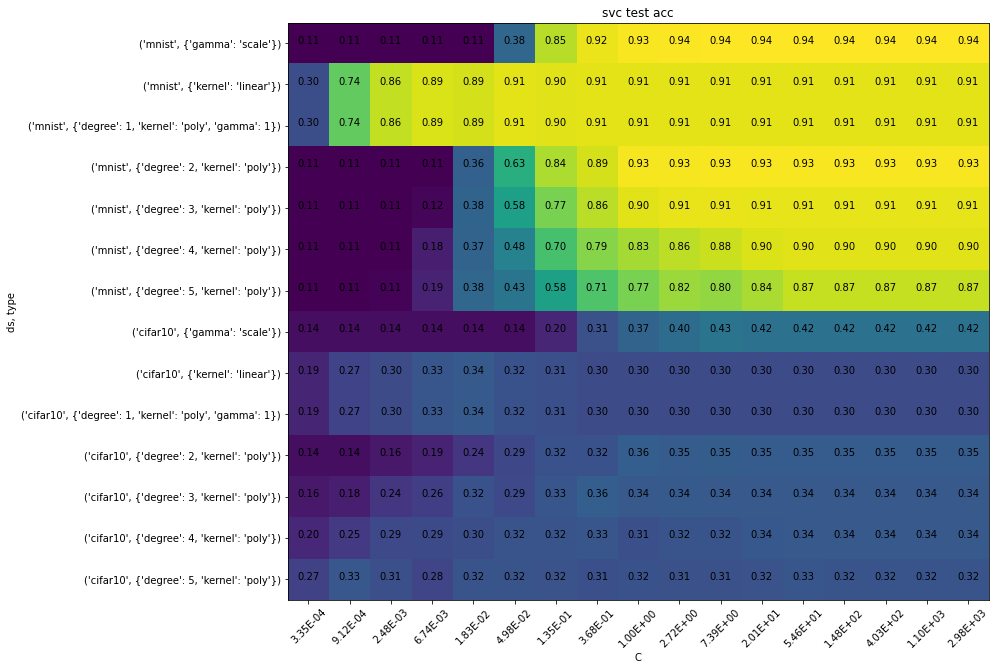

In [3]:
import matplotlib.pyplot as plt


def show_categ_heatmap(row_labels, col_labels, vals, show_scale=0.8):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.figure(figsize=(len(col_labels) * show_scale,
               len(row_labels) * show_scale))
    plt.imshow(vals)
    plt.xticks(np.arange(len(col_labels)), col_labels)
    plt.yticks(np.arange(len(row_labels)), row_labels)
    plt.tick_params('x', labelrotation=45)
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            plt.annotate("{:.2f}".format(vals[i][j]), (j, i), ha="center")
    plt.tight_layout()


show_categ_heatmap(row_labels, ["{:.2E}".format(i) for i in col_labels], accs)
plt.title("svc test acc")
plt.xlabel("C")
plt.ylabel("ds, type")


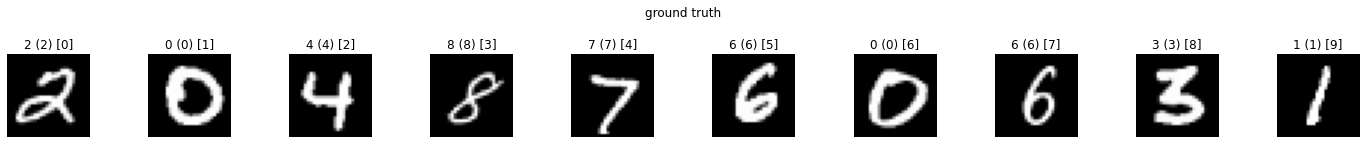

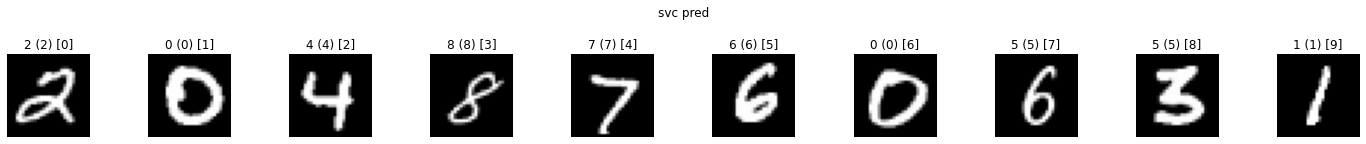

In [4]:
import numpy as np
utulek.show_img_ds(
    *dss["mnist"][1],
    samples=np.arange(10).reshape((1, 10)))
plt.suptitle("ground truth")
plt.tight_layout()
utulek.show_img_ds(
    dss["mnist"][1][0],
    svcs[2][8].predict(utulek.transform_flatten_img_ds_X(dss["mnist"][1][0])),
    samples=np.arange(10).reshape((1, 10)))
plt.suptitle("svc pred")
plt.tight_layout()
